# Handwritten digits recognition (using Convolutional Neural Network)
### Mantas Macionis
### C00242178

This is a Demo Notebook based on Convolutional Neural Networks, Originally created by trekhleb and downloaded from [github](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb) 

The purpose of editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

[Go to CHANGELOG](#changelog)

## Changelog 
- Obtained accuracy metrics for the original model
- loaded in the Intel Image recognition dataset from [Kaggle](https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data)
- Modified model architecture to suit new dataset
- Trained model with new dataset
- Tested model effectiveness by testing with sample photos
- during training Loss scores werent ideal
- Changed model architecture to include a dropout layer
- Loss values improved
- Visualised new scores
- output confusion matrix for the new model
- Saved different model versions as .h5 files (Same format as the original notebook) 

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](./digits_recognition_cnn.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [1]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.__version__)

Python version: 3.9.0
Tensorflow version: 2.15.0
Keras version: 2.15.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [5]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [6]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [7]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [9]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [10]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

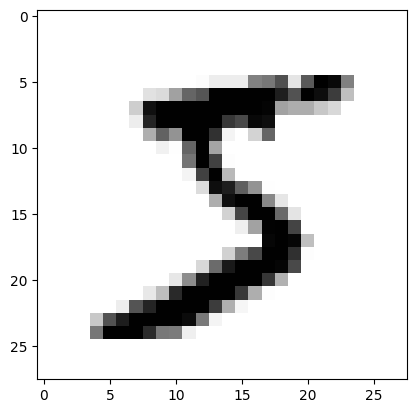

In [11]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

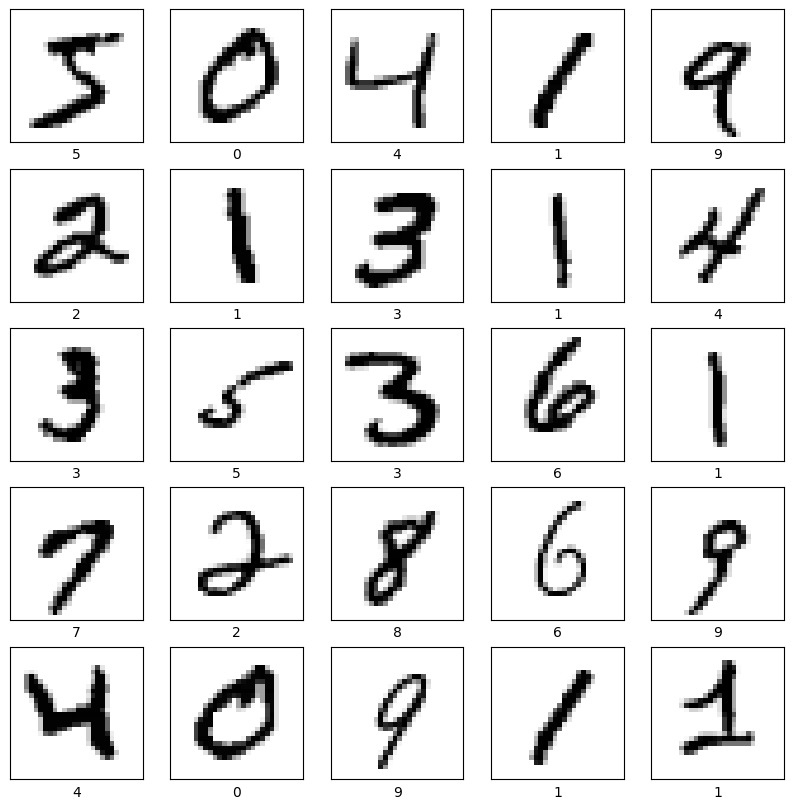

In [12]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [13]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [14]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [15]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [16]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Here is our model summary so far.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [21]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile the model

In [22]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [23]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2133 - accuracy: 0.9347 - val_loss: 0.0641 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0360 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0320 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0260 - val_accurac

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

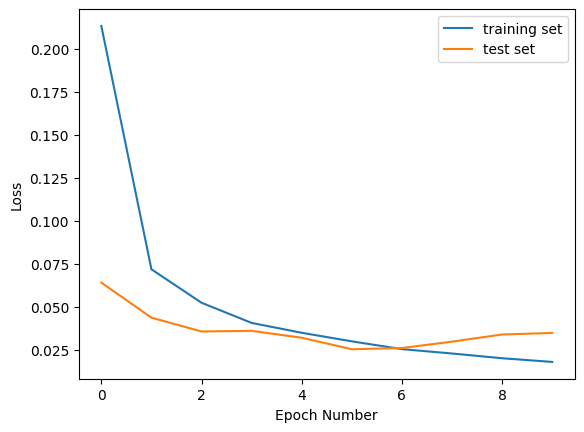

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

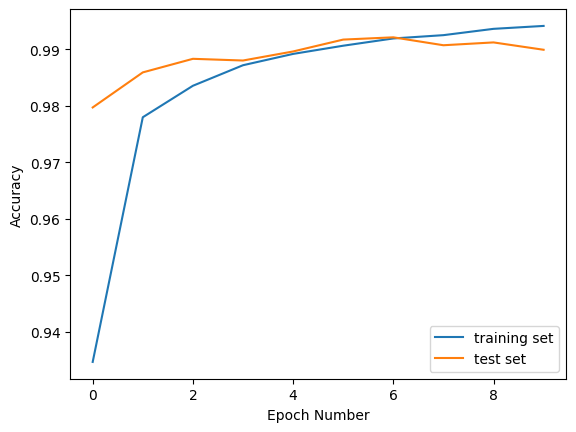

In [25]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [26]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [27]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.009147685021162033
Training accuracy:  0.996916651725769


### Test set accuracy

In [28]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [29]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.034800026565790176
Validation accuracy:  0.9898999929428101


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [30]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

c:\users\35387\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [32]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 0s 917us/step


In [33]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [34]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.723975e-15,3.550093e-11,1.880833e-09,4.083913e-10,2.245609e-12,4.431970e-11,2.771755e-17,1.000000e+00,4.145533e-15,1.031967e-09
1,2.263493e-09,2.360992e-10,1.000000e+00,1.978939e-13,2.189919e-12,2.582151e-17,1.815711e-08,1.195708e-14,1.319579e-09,9.285244e-14
2,9.376709e-13,1.000000e+00,1.978873e-08,1.058675e-12,2.502932e-09,4.027250e-11,2.316666e-09,1.517107e-08,2.182035e-08,1.952837e-11
3,9.999766e-01,6.813425e-16,2.877545e-08,4.397851e-09,2.203217e-11,2.816114e-08,2.230462e-05,1.661429e-12,4.022415e-09,9.981662e-07
4,4.035436e-10,2.867458e-07,5.106101e-09,1.884746e-09,9.998139e-01,4.367282e-08,2.445337e-11,1.499891e-06,1.035951e-09,1.843650e-04
...,...,...,...,...,...,...,...,...,...,...
9995,6.686380e-18,7.648688e-12,1.000000e+00,1.247607e-12,2.056026e-17,1.348154e-23,5.108394e-17,3.739202e-08,5.988542e-12,1.393284e-18
9996,1.048163e-12,4.926811e-09,3.260252e-12,9.996932e-01,4.771119e-14,3.063273e-04,2.663582e-11,6.771780e-11,1.470113e-09,5.757136e-07
9997,3.882642e-19,8.401586e-10,8.274842e-16,4.916501e-17,1.000000e+00,5.020463e-14,6.075197e-15,4.806930e-12,3.749813e-09,1.769405e-10
9998,2.279557e-17,3.373290e-16,9.298345e-21,7.669464e-15,1.012980e-18,1.000000e+00,1.572877e-10,6.230653e-19,1.658025e-10,2.305138e-15


In [35]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [36]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

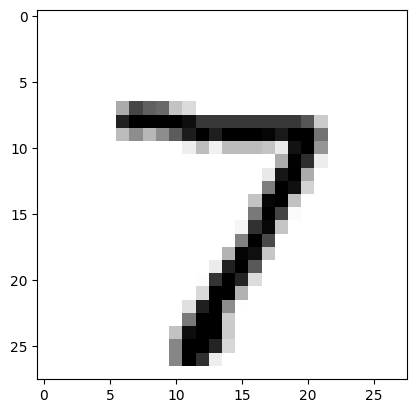

In [37]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

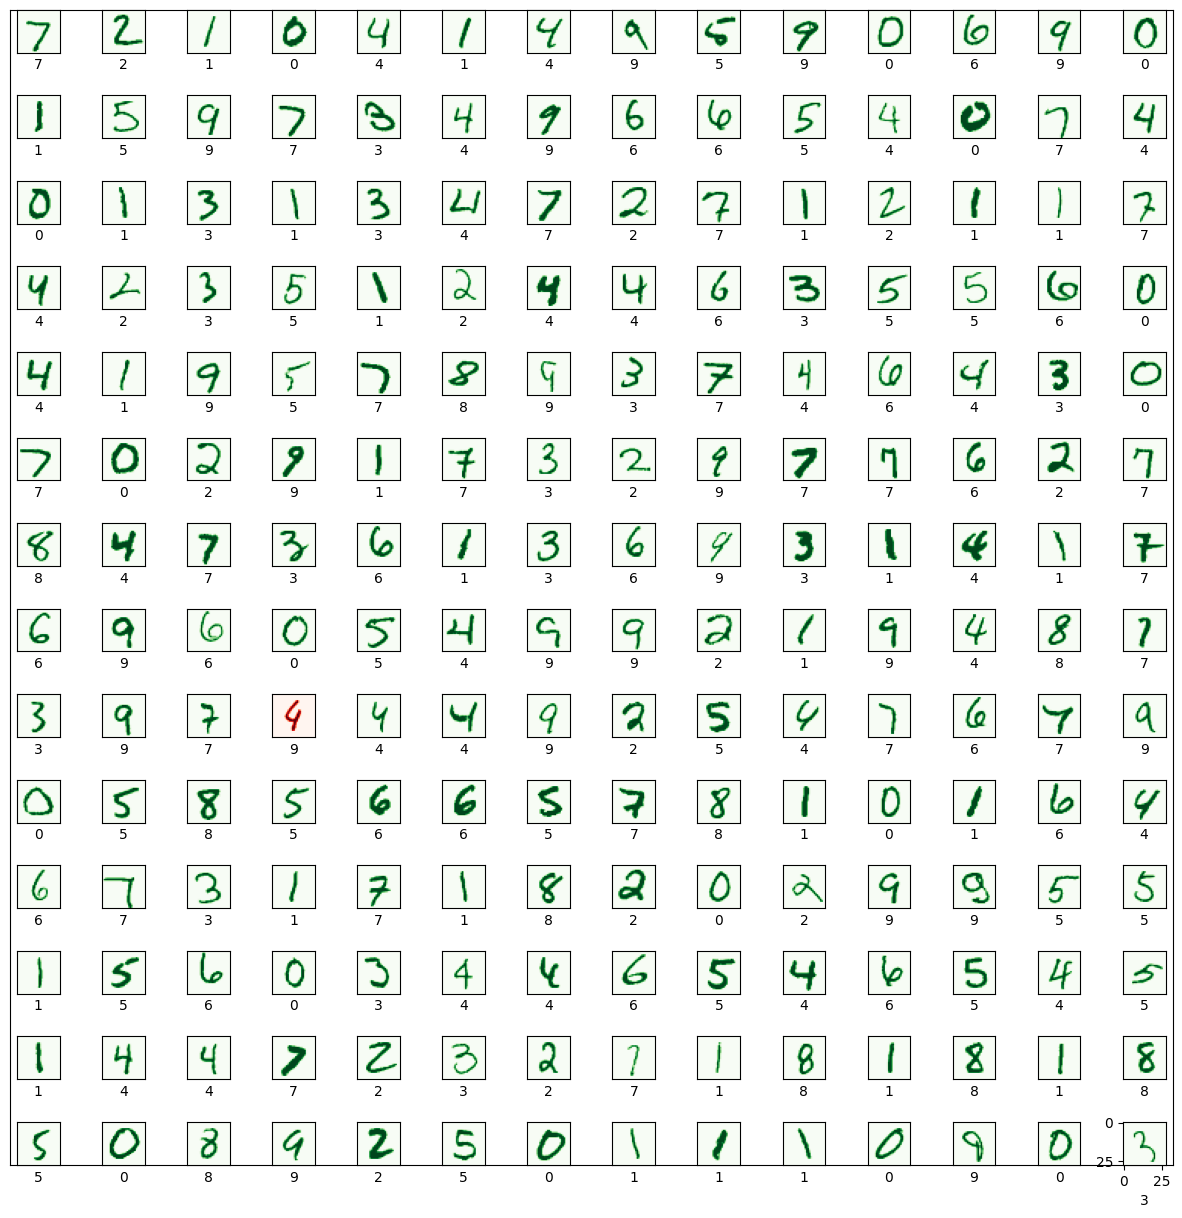

In [38]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

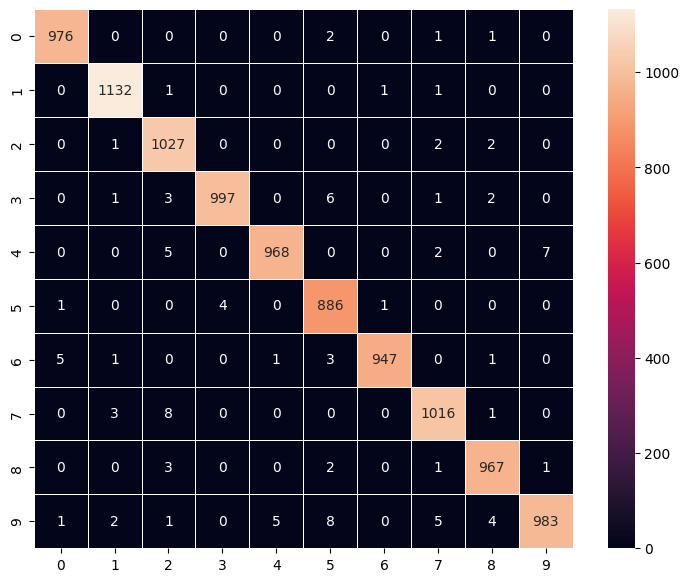

In [39]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/digits_recognition_cnn/digits_recognition_cnn.h5 \
  ./demos/public/models/digits_recognition_cnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.

<a id="changelog"></a>
# CHANGELOG

<h4>Retrieving accuracy scores for original model -
original model uses MNIST dataset, a collection of handwritten digits 70,000 images , 28x28</h4>

In [41]:
print('Training accuracy: ', train_accuracy)
print('Validation accuracy: ', validation_accuracy)

Training accuracy:  0.996916651725769
Validation accuracy:  0.9898999929428101


<h2>Accuracy scores are high inticating the model suits the dataset well</h2>
<h3>Load and pre Process Intel image classification dataset - Downloaded from kaggle</h3>

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerators for train and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify paths
train_directory = './seg_train/'
test_directory = './seg_test/'

# Generate batches of tensor image data for training
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generate batches of tensor image data for validation
validation_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


<h2>Modification of the model architecture to suit the new dataset</h2> 

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

<h2>Training the model with the new dataset</h2> 

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
438/438 [==============================] - 175s 397ms/step - loss: 0.9851 - accuracy: 0.6241 - val_loss: 0.7560 - val_accuracy: 0.6946
Epoch 2/10
438/438 [==============================] - 138s 316ms/step - loss: 0.6001 - accuracy: 0.7791 - val_loss: 0.5656 - val_accuracy: 0.7933
Epoch 3/10
438/438 [==============================] - 135s 308ms/step - loss: 0.4216 - accuracy: 0.8509 - val_loss: 0.5396 - val_accuracy: 0.8118
Epoch 4/10
438/438 [==============================] - 136s 311ms/step - loss: 0.2731 - accuracy: 0.9031 - val_loss: 0.5718 - val_accuracy: 0.8138
Epoch 5/10
438/438 [==============================] - 136s 310ms/step - loss: 0.1823 - accuracy: 0.9372 - val_loss: 0.6550 - val_accuracy: 0.8115
Epoch 6/10
438/438 [==============================] - 135s 308ms/step - loss: 0.1020 - accuracy: 0.9654 - val_loss: 0.7483 - val_accuracy: 0.8132
Epoch 7/10
438/438 [==============================] - 135s 309ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.8951 -

<h2>The training loss starts quite high at 0.9851 but significantly decreases to 0.0461.</h2>
<h2>showing effective learning but also suggesting that 
ter dataset is more complex than MNIST</h2>

The accuracy stops improving while loss increases, indicating potential overfitting.

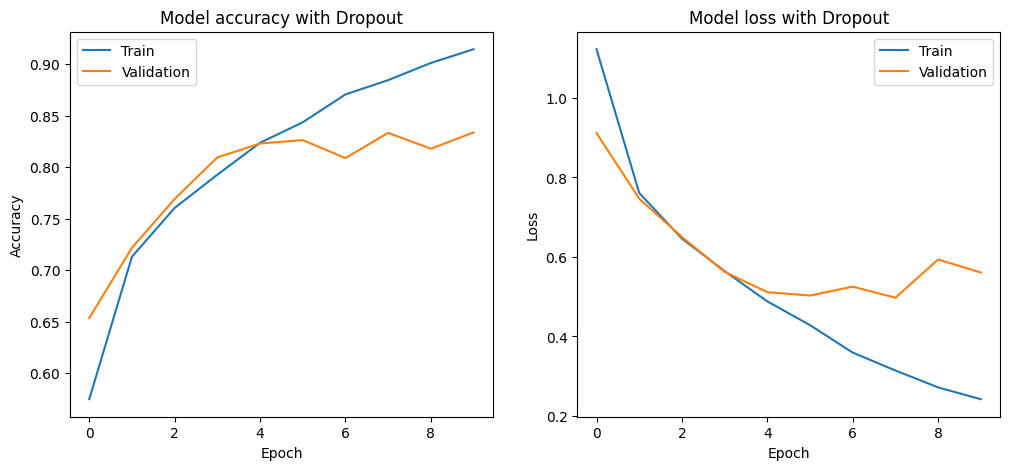

In [65]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Train')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation')
plt.title('Model accuracy with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Train')
plt.plot(history_with_dropout.history['val_loss'], label='Validation')
plt.title('Model loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [50]:
# Saving the model
model_name = 'intel_recognition_cnn.h5'
model.save(model_name, save_format='h5')

c:\users\35387\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h2>Loading and preprocessing a random image from the seg_pred folder(sample images)</h2>  

In [55]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Path to the prediction directory
pred_directory = './seg_pred/'

# List all files in the directory and pick a random one
all_files = os.listdir(pred_directory)
random_file = np.random.choice(all_files)

# Load and preprocess the image
img_path = os.path.join(pred_directory, random_file)
image = load_img(img_path, target_size=(150, 150))
image_array = img_to_array(image) / 255.0  # Rescale the image

# Add an extra dimension to the image array to make it compatible with the model input
image_array = np.expand_dims(image_array, axis=0)


<h2>loading the trained model and making the prediction</h2>

In [56]:
# Load the previously trained model
model = load_model('intel_recognition_cnn.h5')

# Predict the class of the image
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 61ms/step


Displaying the image and prediction

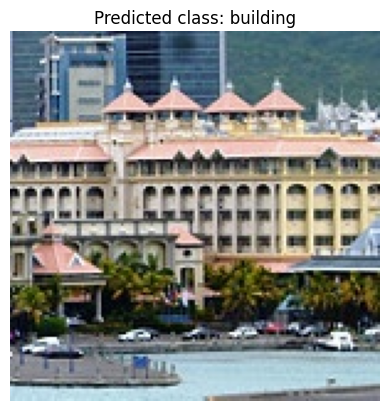

In [66]:
class_names = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street'] 

# Show the image and prediction
plt.imshow(image)
plt.title(f'Predicted class: {class_names[predicted_class[0]]}')
plt.axis('off')  
plt.show()


<h2>Adding a dropout layer to the model architecture, attempting to solve stuck val_accuracy score with increasing loss</h2> 

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Rebuild the model with added Dropout layers
model_with_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after the first pooling layer
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Another dropout layer after the second pooling layer

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Another dropout layer after the third pooling layer

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout before the final dense layer
    Dense(6, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model to see the layers and parameters
model_with_dropout.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 64)       

<h2>Re Training the model</h2> 

In [62]:
history_with_dropout = model_with_dropout.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/10
438/438 [==============================] - 158s 360ms/step - loss: 1.1226 - accuracy: 0.5748 - val_loss: 0.9116 - val_accuracy: 0.6536
Epoch 2/10
438/438 [==============================] - 156s 357ms/step - loss: 0.7610 - accuracy: 0.7131 - val_loss: 0.7467 - val_accuracy: 0.7218
Epoch 3/10
438/438 [==============================] - 156s 355ms/step - loss: 0.6462 - accuracy: 0.7605 - val_loss: 0.6503 - val_accuracy: 0.7692
Epoch 4/10
438/438 [==============================] - 156s 355ms/step - loss: 0.5644 - accuracy: 0.7927 - val_loss: 0.5624 - val_accuracy: 0.8095
Epoch 5/10
438/438 [==============================] - 156s 355ms/step - loss: 0.4882 - accuracy: 0.8237 - val_loss: 0.5114 - val_accuracy: 0.8229
Epoch 6/10
438/438 [==============================] - 156s 355ms/step - loss: 0.4284 - accuracy: 0.8435 - val_loss: 0.5029 - val_accuracy: 0.8263
Epoch 7/10
438/438 [==============================] - 155s 354ms/step - loss: 0.3593 - accuracy: 0.8706 - val_loss: 0.5252 -

<h2>Dropout layers showing a noticeable effect in decreasing overfitting, with loss consistently decreasing until later epochs</h2>
<h3>Training could be stopped early for score optimization</h3>

In [63]:
# Saving the model
model_name = 'dropout_intel_recognition_cnn.h5'
model.save(model_name, save_format='h5')

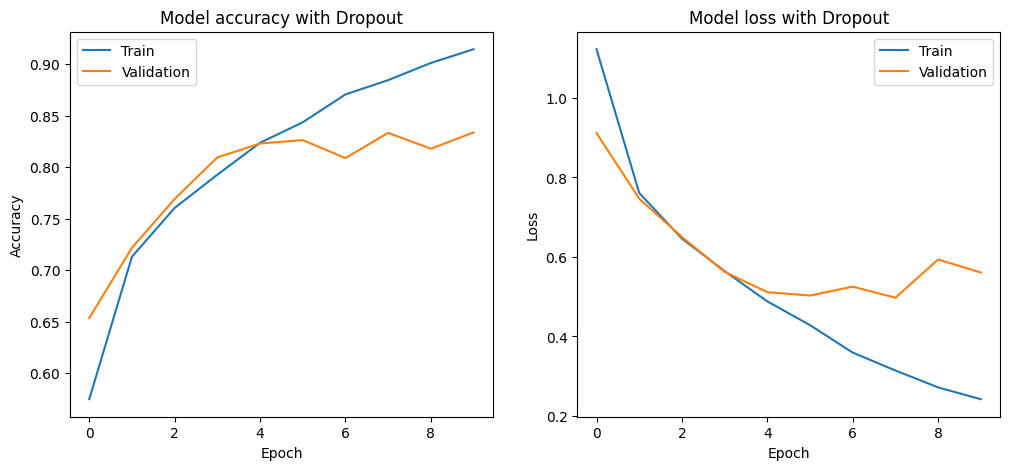

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Train')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation')
plt.title('Model accuracy with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Train')
plt.plot(history_with_dropout.history['val_loss'], label='Validation')
plt.title('Model loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


<h2>Confusion matrix for new model</h2>

In [67]:
# Predict the labels for the validation dataset
val_images, val_labels = next(validation_generator)
predictions = model_with_dropout.predict(val_images)

# Convert predictions from one-hot encoded to class numbers
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)


1/1 [==============================] - 0s 111ms/step


In [68]:
from tensorflow.math import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print(cm)


tf.Tensor(
[[4 0 0 1 0 0]
 [0 4 0 0 0 2]
 [0 0 4 1 0 0]
 [0 0 1 3 1 0]
 [0 0 1 3 4 0]
 [0 0 0 0 0 3]], shape=(6, 6), dtype=int32)


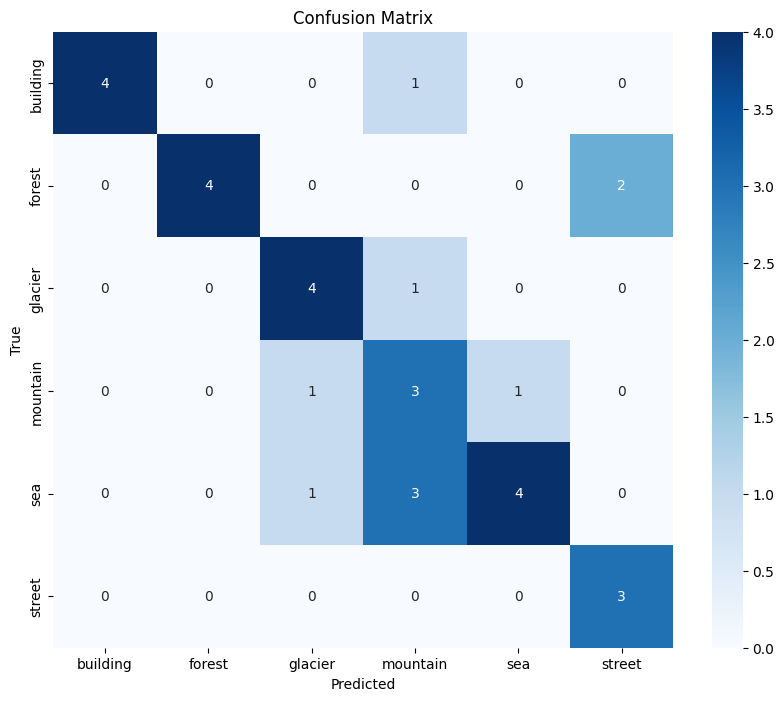

In [69]:
import matplotlib.pyplot as plt

# Define the size 
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Adding the aesthetics
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
